In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#getting the data 
Cancer = pd.read_csv('//home//kailash//Untitled Folder//haberman.csv' ,names=['Age','Nodes','Operation','Survival'])       
Cancer.head(12)

,Age,Nodes,Operation,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [7]:
print(' Dataset Shape: {} \n *********************** \n Dataset Columns:{} \n ********************** \n Data Description:{} \n ********************** \n Does Data contains null values \n  {} '\
      .format(Cancer.shape, Cancer.columns, Cancer.describe(), Cancer.isnull().all()))

 Dataset Shape: (306, 4) 
 *********************** 
 Dataset Columns:Index(['Age', 'Nodes', 'Operation', 'Survival'], dtype='object') 
 ********************** 
 Data Description:              Age       Nodes   Operation    Survival
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000 
 ********************** 
 Does Data contains null values 
  Age          False
Nodes        False
Operation    False
Survival     False
dtype: bool 


#### obervations
 we have 4 attributes with 306 observations.
patient age group is from 30 -83 .
luckly none of our columns have missing values.


In [8]:
survival1 = Cancer.groupby('Survival').groups[1] 
survival2 = Cancer.groupby('Survival').groups[2] 
print('Number of obervations from patient lived 5 yrs or more {} \nNumber of obervations from patient died within 5 years {}'\
      .format(len(survival1),len(survival2)))

Number of obervations from patient lived 5 yrs or more 225 
Number of obervations from patient died within 5 years 81


## observations
    type 1 ----  5 years and more ----- 225 
    type 2 ----  less than 5 yrs  ----- 81 
    Dataset is unbalaced

## Objective:
    Objective of the analysis to find patterns regarding
    Survival rate of the patients affected with breast cancer.

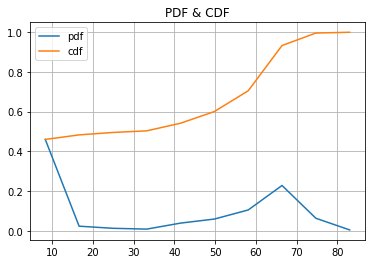

In [9]:
# Cancer[(Cancer['Operation']==0) & (Cancer['Survival']==2)].count()/306
peaks, interval = np.histogram(Cancer,bins=10,density=True) 
pdf = peaks / sum(peaks)
cdf = np.cumsum(pdf)
plt.plot(interval[1:],pdf,label='pdf')
plt.plot(interval[1:],cdf,label='cdf')
plt.legend()
plt.grid()
plt.xlabel('')
plt.title('PDF & CDF')
plt.show()

/home/kailash/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/kailash/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/kailash/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/kailash/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwa

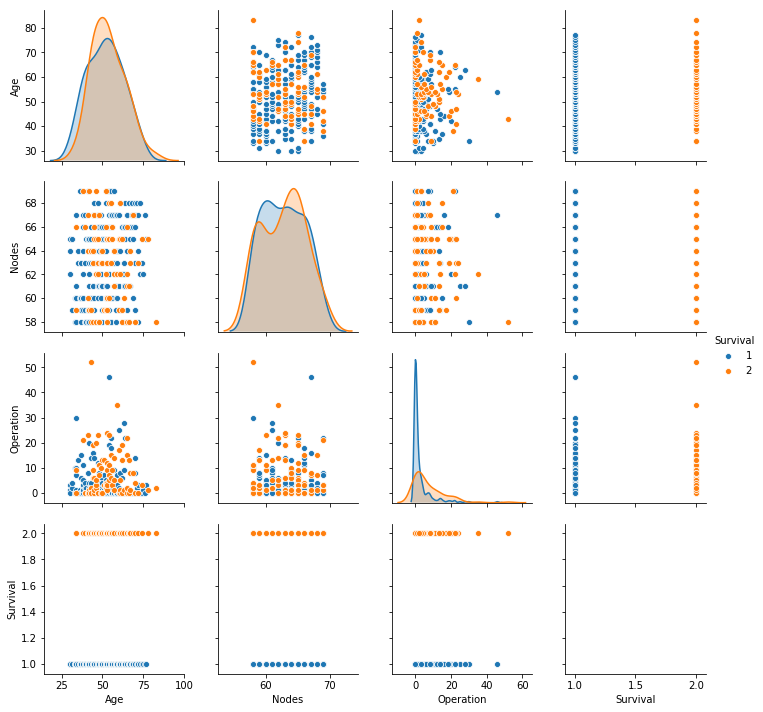

In [10]:
sns.pairplot(data=Cancer,hue='Survival')

/home/kailash/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


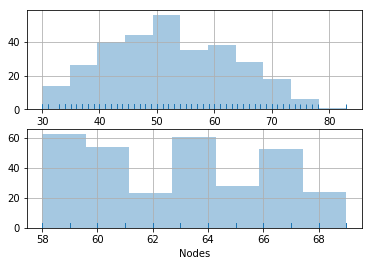

In [11]:
plt.figure(1)
plt.subplot(2,1,1)
sns.distplot(Cancer.Age, kde=False, rug=True)
plt.grid()
plt.subplot(2,1,2)
sns.distplot(Cancer.Nodes, kde=False, rug=True)
plt.grid()


In [12]:
Cancer[(Cancer.Age > 49 ) & (Cancer.Age <54)].count()

Age          43
Nodes        43
Operation    43
Survival     43
dtype: int64

# Observation:
    Within th age group of 49-54 large number of women are seen affected with breast cancer.

In [13]:
NodesSum = Cancer.Nodes.sum() #19233
Cancer['NodesProb'] = (Cancer.Nodes/NodesSum)*100

In [34]:
Cancergrp =Cancer
Cancergrp['AgeGrp'] = pd.cut(Cancergrp['Age'],[20,30,40,50,60,70,80,90])
Cancergrp['NodesProb'] = (Cancergrp['Nodes']/Cancergrp['Nodes'].sum())*100
Cancergrp.groupby('AgeGrp',as_index=False).sum()

,AgeGrp,Age,Nodes,Operation,Survival,NodesProb
0,"(20, 30]",90,191,4,3,0.993085
1,"(30, 40]",1464,2482,160,44,12.904903
2,"(40, 50]",4239,5841,389,122,30.369677
3,"(50, 60]",5126,5860,453,119,30.468466
4,"(60, 70]",4091,3964,211,81,20.610409
5,"(70, 80]",959,837,13,16,4.351895
6,"(80, 90]",83,58,2,2,0.301565


# Observation:
    Age grp 40 - 60 have probabilty of getting more cancer nodes

In [35]:
Cancer1 = Cancer[Cancer['Survival'] == 1]
Cancer2 = Cancer[Cancer['Survival'] == 2]

In [43]:
Cancer1['AgeGrp'] = pd.cut(Cancer1['Age'],[20,30,40,50,60,70,80,90])
Cancer1['NodesProb'] = (Cancer1['Nodes']/Cancer1['Nodes'].sum())*100
print('More than 5 years')
Cancer1.groupby('AgeGrp',as_index=False).sum()

More than 5 years


/home/kailash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/kailash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,AgeGrp,Age,Nodes,Operation,Survival,NodesProb
0,"(20, 30]",90,191,4,3,1.350396
1,"(30, 40]",1319,2222,130,36,15.709842
2,"(40, 50]",2926,4013,165,64,28.372455
3,"(50, 60]",3710,4223,221,67,29.857183
4,"(60, 70]",2924,2851,99,45,20.156957
5,"(70, 80]",735,644,9,10,4.553167
6,"(80, 90]",0,0,0,0,0.000000


In [40]:
Cancer2['AgeGrp'] = pd.cut(Cancer2['Age'],[20,30,40,50,60,70,80,90])
Cancer2['NodesProb'] = (Cancer2['Nodes']/Cancer2['Nodes'].sum())*100
print('Less than 5 years')
Cancer2.groupby('AgeGrp',as_index=False).sum()

Less than 5 years


/home/kailash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/kailash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,AgeGrp,Age,Nodes,Operation,Survival,NodesProb
0,"(20, 30]",0,0,0,0,0.000000
1,"(30, 40]",145,260,30,8,5.109059
2,"(40, 50]",1313,1828,224,58,35.920613
3,"(50, 60]",1416,1637,232,52,32.167420
4,"(60, 70]",1167,1113,112,36,21.870702
5,"(70, 80]",224,193,4,6,3.792494
6,"(80, 90]",83,58,2,2,1.139713


ValueError: x and y must have same first dimension, but have shapes (1,) and (81,)

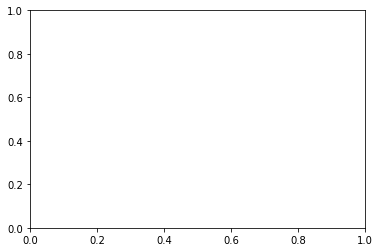

In [50]:
plt.plot(Cancer2.AgeGrp.idxmin(),Cancer2.Survival)

<Figure size 432x288 with 0 Axes>

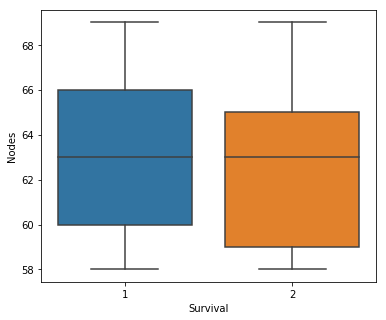

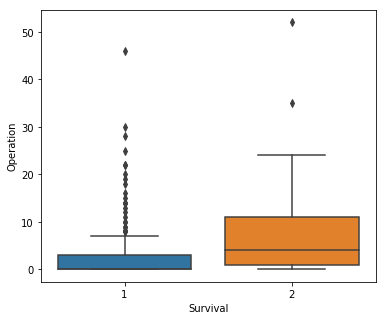

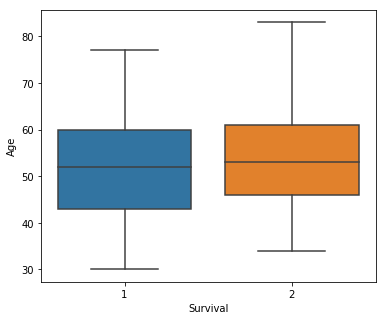

In [89]:
plt.figure(1)
plt.figure(figsize=(6,5))
sns.boxplot(x='Survival',y='Nodes', data=Cancer)
plt.show()
plt.figure(figsize=(6,5))
sns.boxplot(x='Survival',y='Operation', data=Cancer)
plt.show()
plt.figure(figsize=(6,5))
sns.boxplot(x='Survival',y='Age', data=Cancer)

# Obeservation:
    patients with operations more than 4 times had less survival rate
    

/home/kailash/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


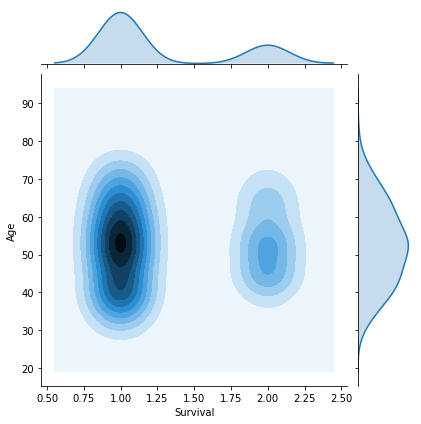

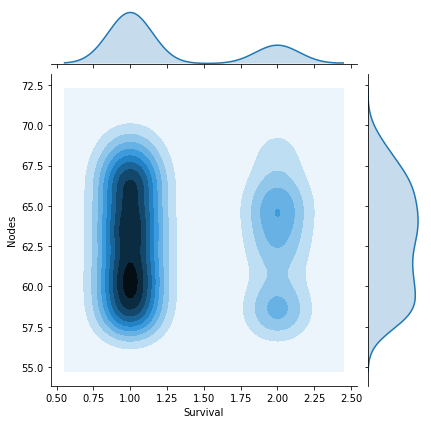

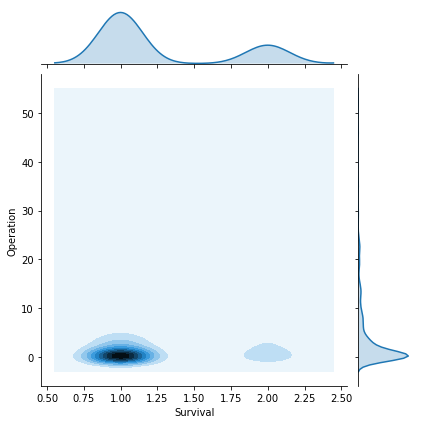

In [95]:
sns.jointplot(Cancer.Survival,Cancer.Age,kind='kde')
sns.jointplot(Cancer.Survival,Cancer.Nodes,kind='kde')
sns.jointplot(Cancer.Survival,Cancer.Operation,kind='kde')

/home/kailash/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


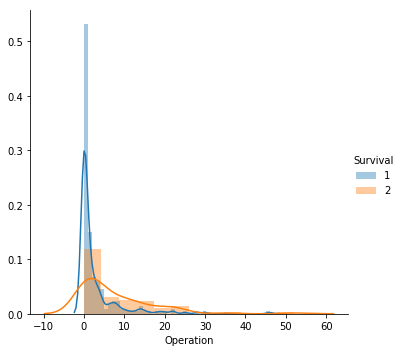

In [115]:
sns.FacetGrid(Cancer, hue="Survival", height=5) \
   .map(sns.distplot,"Operation") \
   .add_legend()

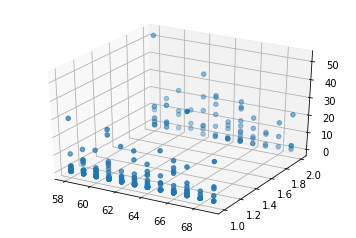

In [96]:
from mpl_toolkits.mplot3d import Axes3D
x = np.array(Cancer.Nodes)
y = np.array(Cancer.Survival)
z = np.array(Cancer.Operation)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z,depthshade=True)

/home/kailash/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

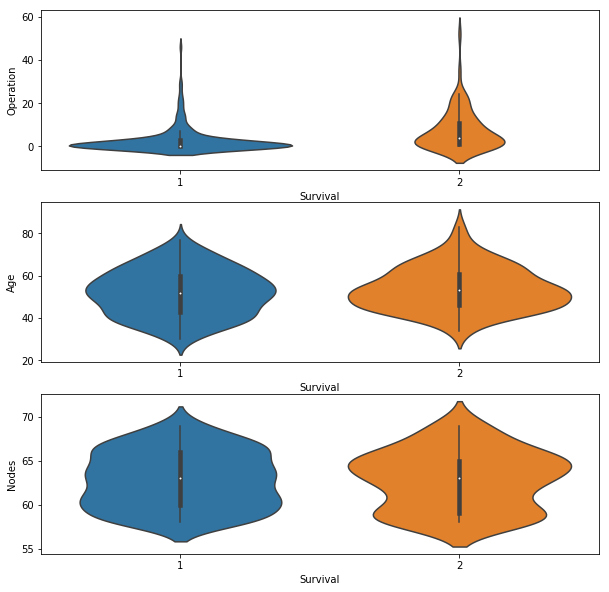

In [108]:
plt.figure(1)
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.violinplot(x='Survival',y='Operation',data=Cancer)
plt.subplot(3,1,2)
sns.violinplot(x='Survival',y='Age',data=Cancer) 
plt.subplot(3,1,3)
sns.violinplot(x='Survival',y='Nodes',data=Cancer) 

In [111]:
Cancer[(Cancer['Operation']<4)& (Cancer['Survival']==1)].count()

Age          178
Nodes        178
Operation    178
Survival     178
NodesProb    178
AgeGrp       178
dtype: int64

<Figure size 432x288 with 0 Axes>

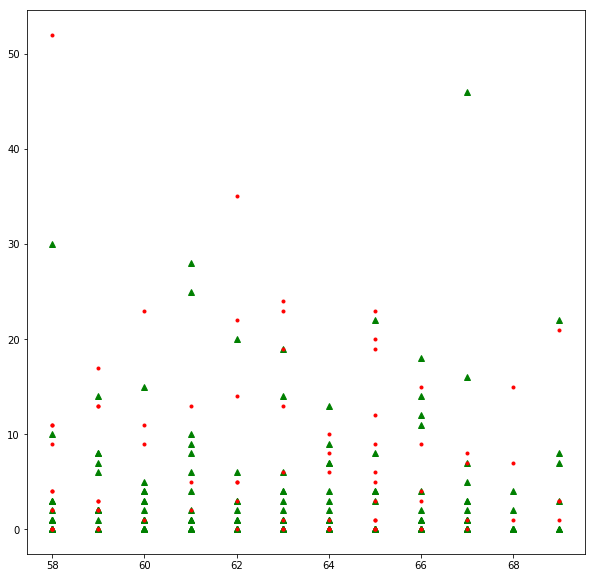

In [120]:
plt.figure(1)
plt.figure(figsize=(10,10))
plt.plot(Cancer1.Nodes,Cancer1.Operation,'g^')
plt.plot(Cancer2.Nodes,Cancer2.Operation,'r.')
plt.show()

### final conculsion:
    patients having 4 and more operation had less survival rate.